In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from src.Net import Net
from src.MyDataset import MyDataset


import time

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
#  CONSTANTS
batch_size = 8
num_workers = 2

epochs = 80
mini_batches_len = 12

In [4]:
# train_set = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
train_set = MyDataset("./labels/train_labels.csv", "./imgs/ref_imgs/train_imgs", transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [5]:
classes = ("apple", "banana", "orange", "pineapple", "watermelon")

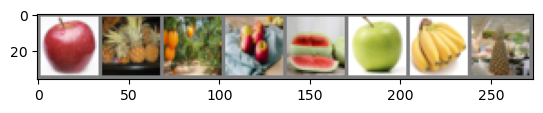

apple pineapple orange apple watermelon apple banana pineapple


In [6]:

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [7]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
start = time.time()

lossArr = []

for epoch in range(epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % mini_batches_len == mini_batches_len-1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / mini_batches_len}')
            
            lossArr.append(running_loss/mini_batches_len)
            
            running_loss = 0.0

end = time.time()

print(f'Finished Training!, Time: {end-start} sec...')

[1, 12] loss: 1.6108253002166748
[1, 24] loss: 1.6113092601299286
[1, 36] loss: 1.6097478667895
[1, 48] loss: 1.6106193860371907
[1, 60] loss: 1.6078606247901917
[1, 72] loss: 1.616437127192815
[1, 84] loss: 1.6106536785761516
[1, 96] loss: 1.6046028137207031
[1, 108] loss: 1.609001745780309
[1, 120] loss: 1.6043889323870342
[1, 132] loss: 1.6129366258780162
[1, 144] loss: 1.6096522907416027
[1, 156] loss: 1.6131232182184856
[1, 168] loss: 1.6077280640602112
[1, 180] loss: 1.6036598285039265
[1, 192] loss: 1.605831354856491
[1, 204] loss: 1.6073889533678691
[1, 216] loss: 1.6092865665753682
[1, 228] loss: 1.599650392929713
[1, 240] loss: 1.6070231199264526
[1, 252] loss: 1.6031934916973114
[1, 264] loss: 1.6024945477644603
[1, 276] loss: 1.612635652224223
[1, 288] loss: 1.6049744089444478
[1, 300] loss: 1.6059897939364116
[1, 312] loss: 1.6099843084812164
[2, 12] loss: 1.6091423829396565
[2, 24] loss: 1.6046639879544575
[2, 36] loss: 1.6034315824508667
[2, 48] loss: 1.6044390102227528


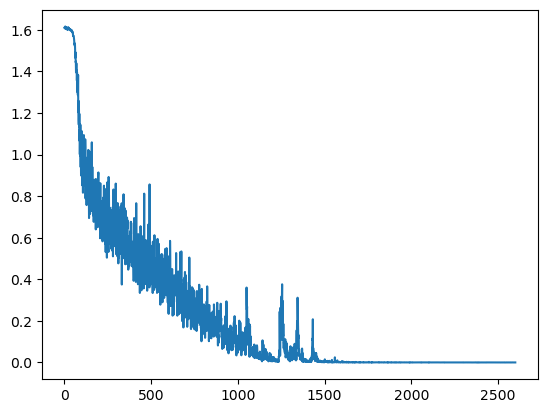

In [10]:
plt.plot(lossArr)


In [11]:
PATH = './model.pth'
torch.save(net.state_dict(), PATH)